In [52]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import xgboost
data_folder = os.path.join('../..', 'data')
file_name = "DataForModel"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
data = util.load_data(data_folder, file_name)
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,Season,ELO diff,Home_prob_ELO,Draw_prob_ELO,...,Diff_shots_on_target_attempted,Diff_shots_on_target_allowed,Diff_shots_attempted,Diff_shots_allowed,Diff_corners_awarded,Diff_corners_conceded,Diff_fouls_commited,Diff_fouls_suffered,Diff_yellow_cards,Diff_red_cards
0,E0,2005-09-17,Aston Villa,Tottenham,1.0,1.0,0506,-25.173204,0.412832,0.245673,...,-9,10,-14,16,20,18,-13,9,-6,0
1,E0,2005-09-17,Portsmouth,Birmingham,1.0,1.0,0506,6.045620,0.468846,0.222236,...,4,-2,4,-4,0,13,6,17,1,0
2,E0,2005-09-17,Sunderland,West Brom,1.0,1.0,0506,-32.751187,0.399092,0.251422,...,9,-1,-4,8,5,0,-1,-21,-3,1
3,E0,2005-09-18,Blackburn,Newcastle,0.0,3.0,0506,34.014412,0.517707,0.201792,...,1,-13,7,-15,5,-14,0,-2,1,0
4,E0,2005-09-18,Man City,Bolton,0.0,1.0,0506,33.333649,0.516538,0.202282,...,3,3,-8,18,-4,2,-6,-17,3,0


In [54]:
X,y = util.prepare_binary_data(data)
X

,ELO diff,Diff_goals_scored,Diff_goals_conceded,Matchrating,Diff_points,Diff_change_in_ELO,Diff_opposition_mean_ELO,Diff_shots_on_target_attempted,Diff_shots_on_target_allowed,Diff_shots_attempted,Diff_shots_allowed,Diff_corners_awarded,Diff_corners_conceded,Diff_fouls_commited,Diff_fouls_suffered,Diff_yellow_cards,Diff_red_cards
0,-25.173204,0,6,-6,-3,-4.599564,-15.115140,-9,10,-14,16,20,18,-13,9,-6,0
1,6.045620,0,-1,1,0,26.619260,-5.363651,4,-2,4,-4,0,13,6,17,1,0
2,-32.751187,-3,-1,-2,-4,-12.177547,17.786764,9,-1,-4,8,5,0,-1,-21,-3,1
3,34.014412,2,-2,4,3,34.014412,3.552154,1,-13,7,-15,5,-14,0,-2,1,0
4,33.333649,1,0,1,3,37.907289,3.634728,3,3,-8,18,-4,2,-6,-17,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33998,-111.203962,-12,4,-16,-11,-66.946979,35.266932,-16,12,-18,28,1,6,6,-19,-4,0
33999,147.385429,6,1,5,2,-9.657930,-31.632773,2,-9,13,-23,-1,5,-29,10,-6,0
34000,-47.482218,-7,-4,-3,-4,7.039467,-7.059827,-7,-7,7,-18,-8,-4,17,6,9,2
34001,-33.608246,4,0,4,3,81.008665,-43.588272,12,9,13,17,-13,-8,7,6,-5,1


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [57]:
base_est = LogisticRegression(penalty='l1', solver='saga')
param_grid={'C': 1. / np.linspace(1e-1, 1e4, 100)}
gscv = GridSearchCV(base_est, param_grid=param_grid, scoring='roc_auc')
gscv.fit(X_train, y_train)
lr, lr_params = gscv.best_estimator_, gscv.best_params_

/Users/heiken/Desktop/NTNU/4. klasse/Artificial Intelligence in Industry/Match Predictor/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/heiken/Desktop/NTNU/4. klasse/Artificial Intelligence in Industry/Match Predictor/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/heiken/Desktop/NTNU/4. klasse/Artificial Intelligence in Industry/Match Predictor/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/heiken/Desktop/NTNU/4. klasse/Artificial Intelligence in Industry/Match Predictor/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ di

In [58]:
lr_score_cv, lr_score_test = gscv.best_score_, roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
print(f'AUC score for C={lr_params["C"]:.2f}: {lr_score_cv:.2f} (cross-validation), {lr_score_test:.2f} (test)')

AUC score for C=10.00: 0.64 (cross-validation), 0.65 (test)


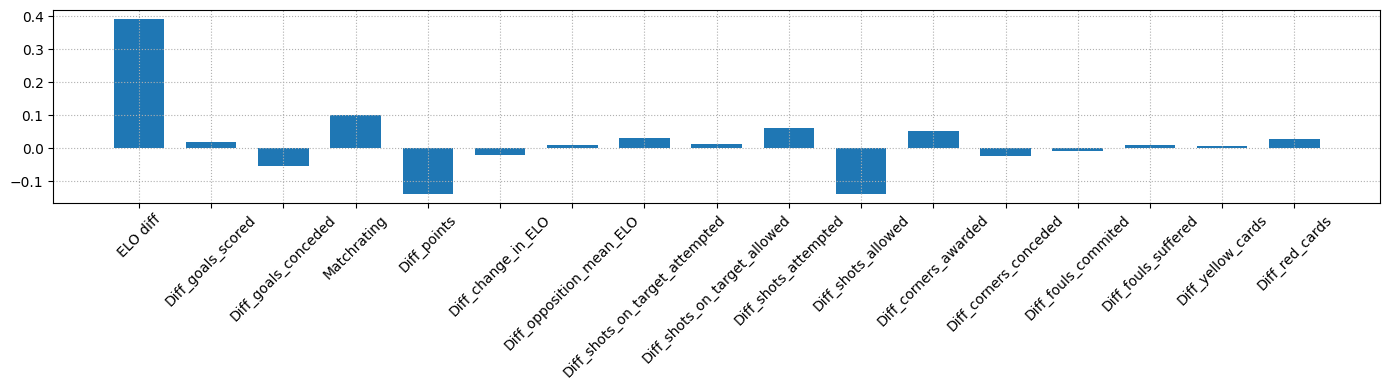

In [59]:
lr_coefs = pd.Series(index=X.columns, data=lr.coef_[0])
util.plot_bars(lr_coefs, figsize=figsize)

In [60]:
base_est = xgboost.XGBClassifier(tree_method='hist', importance_type='total_gain')
param_grid={'max_depth': [2, 3, 4], 'n_estimators': list(range(20, 41, 5)), 'reg_lambda': np.linspace(0, 500, 6)}
gscv = GridSearchCV(base_est, param_grid=param_grid)
gscv.fit(X, y)
xbm, xbm_params = gscv.best_estimator_, gscv.best_params_

In [61]:
xbm_score_cv, xbm_score_test = gscv.best_score_, roc_auc_score(y_test, xbm.predict(X_test))
print(f'AUC score for {xbm_params}: {xbm_score_cv:.2f} (cross-val.), {xbm_score_test:.2f} (test)')

AUC score for {'max_depth': 2, 'n_estimators': 35, 'reg_lambda': np.float64(100.0)}: 0.62 (cross-val.), 0.50 (test)


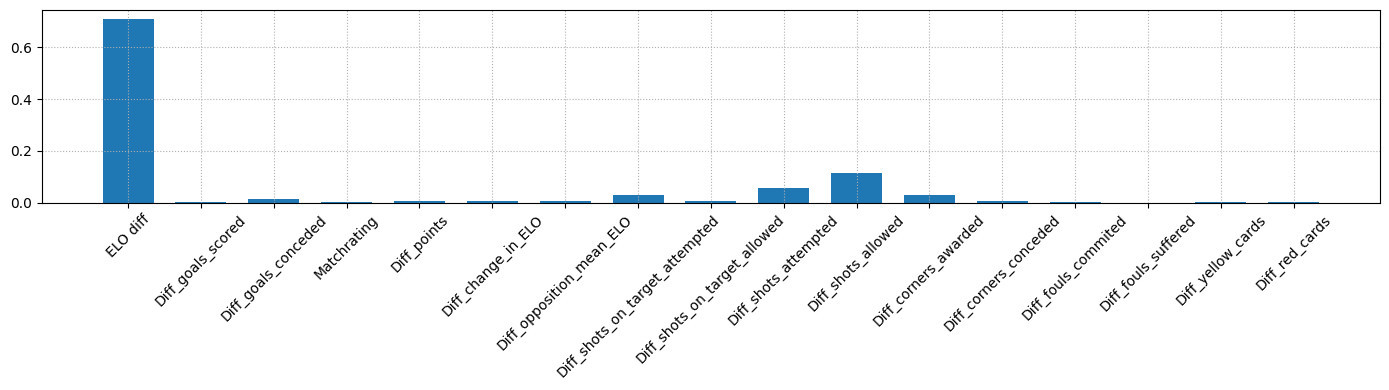

In [62]:
xbm_imp = pd.Series(index=X.columns, data=xbm.feature_importances_)
util.plot_bars(xbm_imp, figsize=figsize)

/var/folders/1k/pyn04stx4cv8pm3wp53v74r80000gn/T/ipykernel_16694/3116684602.py:4: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


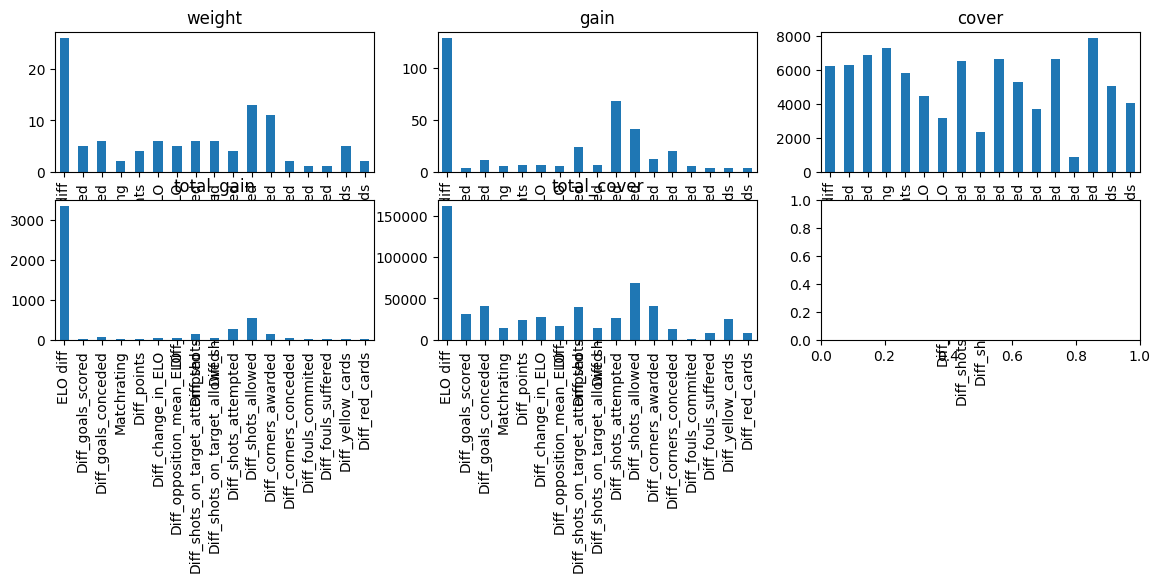

In [63]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=figsize)
for ax, imp_type in zip(axes.ravel(), ['weight', 'gain', 'cover', 'total_gain', 'total_cover']):
    pd.Series(xbm.get_booster().get_score(importance_type=imp_type)).plot.bar(ax=ax, title=imp_type)
plt.tight_layout()

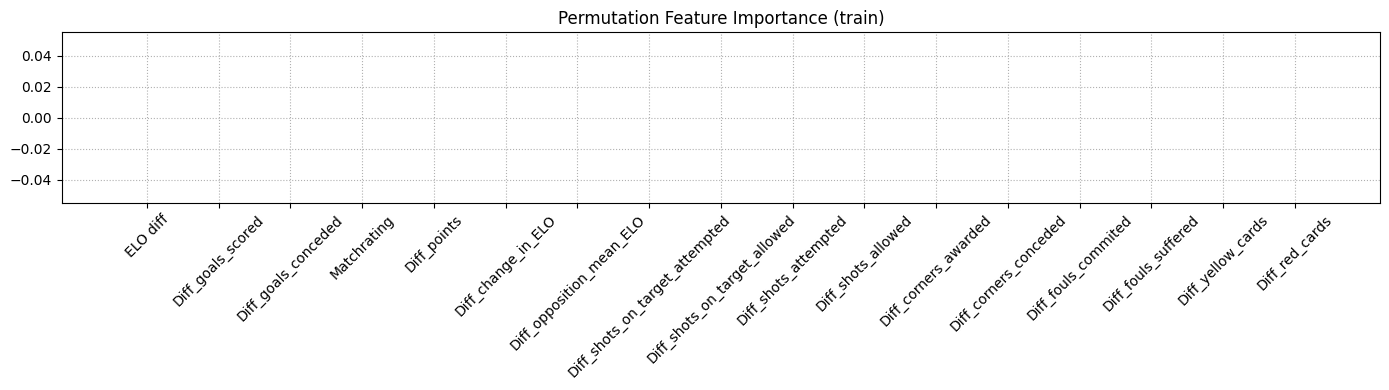

In [64]:
r_train = permutation_importance(xbm, X_train, y_train, n_repeats=30, random_state=42)
xbm_p_imp = pd.Series(index=X.columns, data=r_train.importances_mean)
util.plot_bars(xbm_p_imp, figsize=figsize, std=r_train.importances_std, title='Permutation Feature Importance (train)')

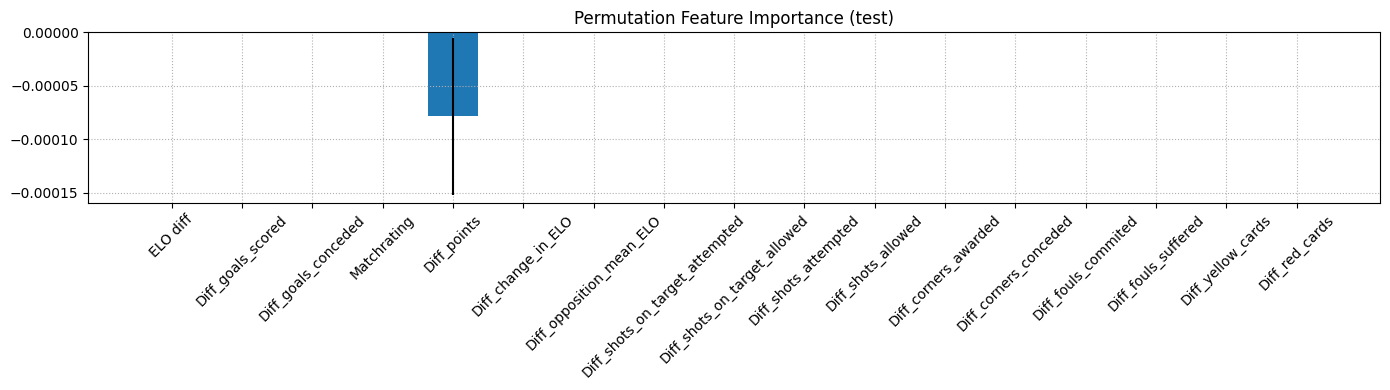

In [65]:
r_test = permutation_importance(xbm, X_test, y_test, n_repeats=30, random_state=42)
xbm_p_imp = pd.Series(index=X.columns, data=r_test.importances_mean)
util.plot_bars(xbm_p_imp, figsize=figsize, std=r_test.importances_std, title='Permutation Feature Importance (test)')